# Trabalho de Robótica Móvel

## Etapa 1 -  Implementacao de um sistema de Localizacao baseado em Odometria para robôs do tipo <i>Skid-Steer</i>

151 15001


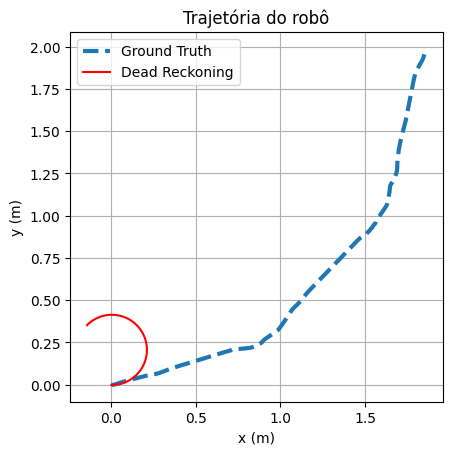

In [2]:
import json
import matplotlib.pyplot as plt

ground_truth = None
odom = None
with open('/home/allan/catkin_ws/src/husky_ekf/gt_data.json') as f:
    ground_truth = json.load(f)

with open('/home/allan/catkin_ws/src/husky_ekf/odom_data.json') as f:
    odom = json.load(f)


# Plot the data
x_gt = [pos['x'] for pos in ground_truth]
y_gt = [pos['y'] for pos in ground_truth]
theta_gt = [pos['theta'] for pos in ground_truth]
# convert to 0 to 2pi
theta_gt = [t if t >= -0.01 else t + 2 * 3.1415 for t in theta_gt]
timestamp_gt = [pos['timestamp'] for pos in ground_truth]
timestamp_gt = [t - timestamp_gt[0] for t in timestamp_gt]
x_odom = [pos['x'] for pos in odom]
print(len(x_odom), len(x_gt))
y_odom = [pos['y'] for pos in odom]
theta_odom = [pos['theta'] for pos in odom]
timestamp_odom = [pos['timestamp'] for pos in odom]
timestamp_odom = [t - timestamp_odom[0] for t in timestamp_odom]
plt.plot(x_gt, y_gt, '--', label='Ground Truth', linewidth=3)
plt.plot(x_odom, y_odom, '-r', label='Dead Reckoning')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.title('Trajetória do robô')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()
plt.show()

In [ ]:
plt.plot(timestamp_gt, x_gt, '--', color='tab:blue', label='x (GT)', linewidth=3)
plt.plot(timestamp_odom, x_odom, '-r', label='x (DR)')
plt.plot(timestamp_gt, y_gt, '--', color='darkorange', label='y (GT)', linewidth=3)
plt.plot(timestamp_odom, y_odom, '-', color='limegreen', label='y (DR)')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.grid()
plt.title(r'Posição $\times$ Tempo')
plt.draw()
plt.show()

In [ ]:
plt.plot(timestamp_gt, theta_gt, '--', color='tab:blue', label='Ground Truth', linewidth=3)
plt.plot(timestamp_odom, theta_odom, '-r', label='Odometry')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel(r'$\theta$ (rad)')
plt.grid()
plt.title(r'$\theta$ $\times$ Tempo')
plt.draw()
plt.show()

In [ ]:
import numpy as np
dt_arr = np.array([0.001, 0.1, 1, 4])
for dt in dt_arr:
    duration = 20
    theta = 0
    x = 0
    y = 0
    v = 0.5
    w = 0.3
    x_odom = []
    y_odom = []
    theta_odom = []
    x_odom.append(x)
    y_odom.append(y)
    theta_odom.append(theta)
    for i in range(1, int(duration/dt)):
        x = x + v * dt * np.cos(theta)
        y = y + v * dt * np.sin(theta)
        theta = theta + w * dt
        x_odom.append(x)
        y_odom.append(y)
        theta_odom.append(theta)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.plot(x_odom, y_odom, label='dt = ' + str(dt) + 's')
    plt.legend()
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.draw()
plt.title('Dead Reckoning com diferentes valores de dt')
plt.grid()
plt.show()